## Exercício: Curva de Benefício

Assuma que estamos lidando com um problema de churn e gostaríamos de entender qual o threshold ótimo da minha classificação. Considere que:
- `y_pred` é o output do meu classificador, indicando a probabilidade de um cliente dar churn, obtido em um backtest
- `y` é o valor real medido, no backtest

Nesta ação, os clientes identificados com alta probabilidade de churn irão receber um voucher de R$30,00 de compras, através de uma ação no próprio site e divulgação por push. Assuma ainda que:

- Cada cliente tem um LTV potencial futuro de R\$ 200,00 (ou seja, perder um cliente custa esse valor para a empresa)
- A ação comercial é 100% eficaz para evitar o churn: O cliente impactado pela iniciativa tem 100% de chance de permanecer na empresa



Obs.: Para cálculo dos valores financeiros, a sugestão é sempre comparar com um caso de referência (ex. caso não houvesse nenhum modelo de churn)




In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

N = 10000
y_pred = np.random.poisson(10, N)
y_pred = y_pred/max(y_pred)

# Create y
y = y_pred -0.2 + np.random.randn(N)/5
y = y.round(0)
y = np.clip(y, 0, 1)

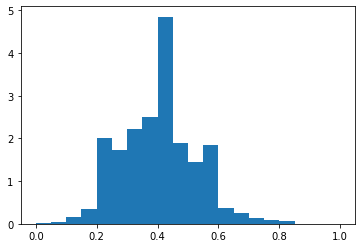

In [2]:
count, bins, ignored = plt.hist(y_pred, 20, density=True)
plt.show()

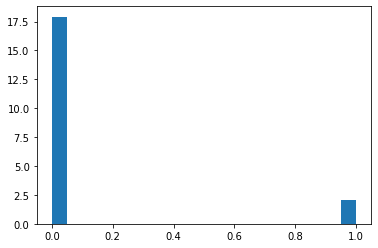

In [3]:
count, bins, ignored = plt.hist(y, 20, density=True)
plt.show()

### Métrica - AUC

Visualizando métricas simples, que independem do theshold

In [4]:
roc_auc_score(y, y_pred)

0.7981163307838817

### Confusion Matrix
Pela matriz de confusão, obtemos os valores de TN, FN, TP, FP

In [5]:
threshold = 0.5
y_pred_round = [1 if x >= threshold else 0 for x in y_pred]
CM = confusion_matrix(y, y_pred_round)
CM

array([[7440, 1519],
       [ 450,  591]], dtype=int64)

In [6]:
f1_score(y, y_pred_round)

0.37511900983814667

In [7]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [8]:
# de todos que eu falo que são positivos, acerto precision%
precision = TP / (TP + FP)
precision

0.2800947867298578

In [9]:
# de todos que de fato são positivos, consigo identificar recall%
recall = TP / (TP + FN)
recall

0.5677233429394812

### Curva de Benefício

Construa a Curva de benefício. 
- Qual o melhor threshold? 
- Esta ação vale a pena? 
- O que você acha que conteceria se o modelo perder performance? Custos da ação aumentarem ou o LTV do cliente diminuir? Se as classes deste problema forem mais ou menos desbalanceadas?